In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from chemevo import Iron as Fe

In [3]:
params = {
   'axes.labelsize': 15,
   'font.size': 15,
   'legend.fontsize': 10,
   'xtick.labelsize': 15,
   'ytick.labelsize': 15,
   'text.usetex': True, #to use TeX in your labels
   'font.family':'serif',
   'axes.titlesize': 15
   }
rcParams.update(params)

colors = ["#0072B2", "#E69F00", "#009E73", "#D55E00", "#CC79A7", "#F0E442"]

In [4]:
eta = 2.5
m_Fe_cc = 0.0012
m_Fe_Ia = 0.0017
r = 0.4
tau_star = 1 #Gyr
tau_dep = 0.323 #Gyr
tau_sfh = 6 #Gyr
tau_Ia = 1.5 #Gyr
tau_dep_Ia = 0.412 #Gyr
tau_Ia_sfh = 2 #Gyr
tau_dep_sfh = 0.341 #Gyr
t_D = 0.15 #Gyr

# 1) Constant SFR

In [5]:
t_array = np.linspace(0,8,100)
M_g_array_const = np.ones(len(t_array))
eq_Z_Fe_const = Fe.Z_Fe_eq_const(m_Fe_cc, m_Fe_Ia, eta, r)
Z_Fe_Ia, Z_Fe_cc, analytical_Z_Fe_const = Fe.Z_Fe_const_sfr(t_array, m_Fe_Ia, m_Fe_cc, eta, r, tau_dep, t_D, tau_Ia)

# Constant SFR, numerical solver
R_0 = 2.2 * 10**-3 #solMass^-1 yr^-1
Z_Fe_const_numerical = Fe.solve_for_Z_Fe(t_array, M_g_array_const, tau_dep, m_Fe_Ia, m_Fe_cc, tau_star, R_0, t_D, tau_Ia)

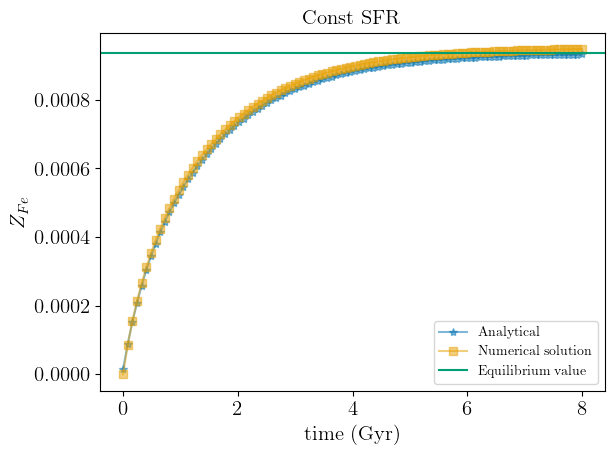

In [6]:
plt.plot(t_array, analytical_Z_Fe_const, color = colors[0], marker='*', label = 'Analytical', alpha = 0.5)
plt.plot(t_array, Z_Fe_const_numerical, color = colors[1], marker = 's', label = 'Numerical solution', alpha = 0.5)
plt.axhline(eq_Z_Fe_const , color = colors[2], label = 'Equilibrium value')

plt.title("Const SFR")
plt.legend()
plt.xlabel('time (Gyr)')
plt.ylabel(r'$Z_{Fe}$')
plt.tight_layout()
plt.show()

# Exponential SFR

$M_{g}(t) = M_{g,0}e^{t/\tau_{sfh}}$


In [7]:
t_array = np.linspace(0,8,100)
M_g_0 = 1
M_g_array_exp = M_g_0 * np.exp(-t_array/tau_sfh)

Z_Fe_cc, Z_Fe_Ia, analytical_Z_Fe_exp = Fe.Z_Fe_exp_sfr(t_array, m_Fe_Ia, m_Fe_cc, t_D, tau_star, tau_dep, tau_sfh, tau_Ia)
Z_Fe_cc_eq, Z_Fe_Ia_eq, analytical_Z_Fe_exp_eq = Fe.Z_Fe_eq_exp(m_Fe_Ia, m_Fe_cc, t_D, tau_star, tau_dep, tau_sfh, tau_Ia)

#Numerical solver
Z_Fe_exp_numerical = Fe.solve_for_Z_Fe(t_array, M_g_array_exp, tau_dep, m_Fe_Ia, m_Fe_cc, tau_star, R_0, t_D, tau_Ia)

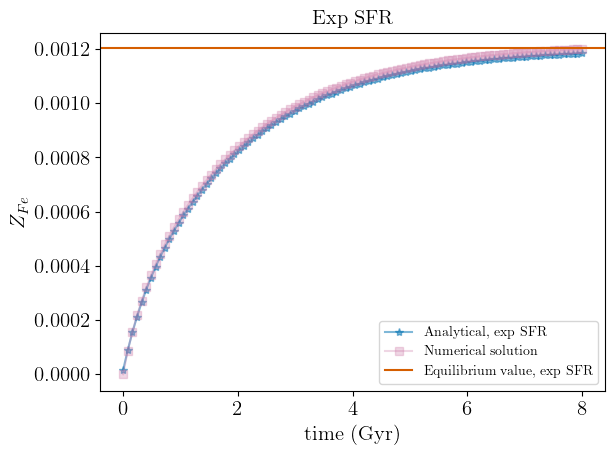

In [8]:
plt.plot(t_array, analytical_Z_Fe_exp, color = colors[0], marker='*', label = 'Analytical, exp SFR', alpha = 0.5)
plt.plot(t_array, Z_Fe_exp_numerical, color = colors[4], label = 'Numerical solution', marker = 's', alpha = 0.3)
plt.axhline(analytical_Z_Fe_exp_eq, color = colors[3], label = 'Equilibrium value, exp SFR')


plt.legend()
plt.xlabel('time (Gyr)')
plt.ylabel(r'$Z_{Fe}$')
plt.title("Exp SFR")
plt.tight_layout()

plt.savefig("exp_sfr_Fe.png", dpi=300)
plt.show()

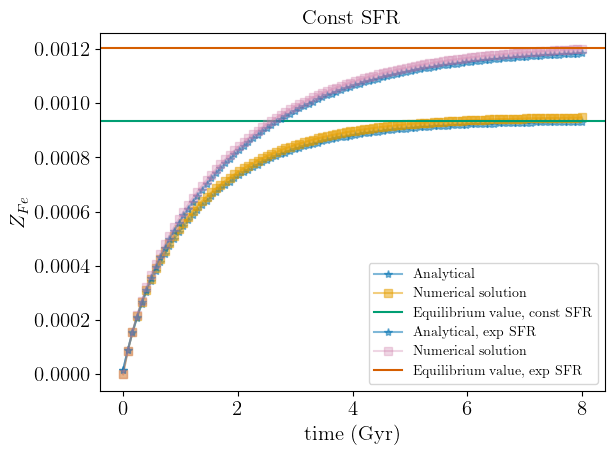

In [ ]:
plt.plot(t_array, analytical_Z_Fe_const, color = colors[0], marker='*', label = 'Analytical, Const SFR', alpha = 0.5)
plt.plot(t_array, Z_Fe_const_numerical, color = colors[1], marker = 's', label = 'Numerical solution', alpha = 0.5)
plt.axhline(eq_Z_Fe_const , color = colors[2], label = 'Equilibrium value, const SFR')


plt.plot(t_array, analytical_Z_Fe_exp, color = colors[0], marker='*', label = 'Analytical, exp SFR', alpha = 0.5)
plt.plot(t_array, Z_Fe_exp_numerical, color = colors[4], label = 'Numerical solution', marker = 's', alpha = 0.3)
plt.axhline(analytical_Z_Fe_exp_eq, color = colors[3], label = 'Equilibrium value, exp SFR')


plt.title("Const SFR")
plt.legend()
plt.xlabel('time (Gyr)')
plt.ylabel(r'$Z_{Fe}$')
plt.tight_layout()
plt.show()

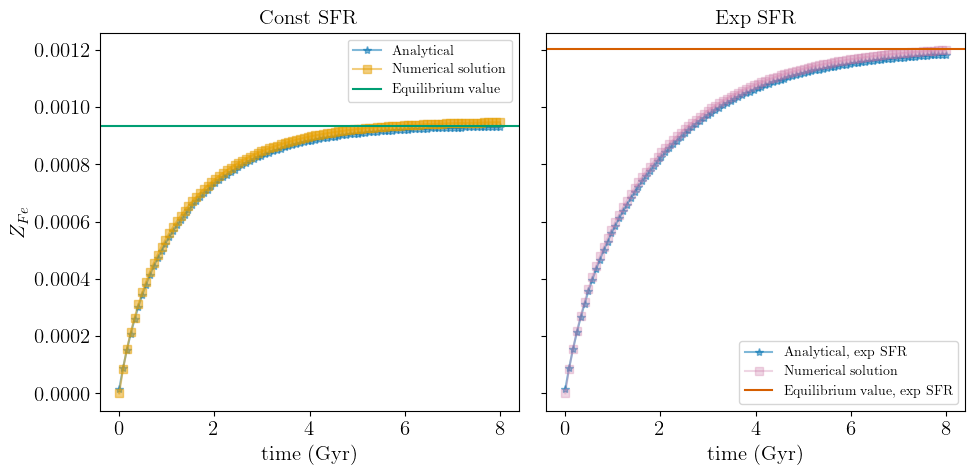

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# --- Left subplot: Const SFR ---
axs[0].plot(t_array, analytical_Z_Fe_const, color=colors[0], marker='*', label='Analytical', alpha=0.5)
axs[0].plot(t_array, Z_Fe_const_numerical, color=colors[1], marker='s', label='Numerical solution', alpha=0.5)
axs[0].axhline(eq_Z_Fe_const, color=colors[2], label='Equilibrium value')

axs[0].set_title("Const SFR")
axs[0].set_xlabel("time (Gyr)")
axs[0].set_ylabel(r"$Z_{Fe}$")
axs[0].legend()

# --- Right subplot: Exp SFR ---
axs[1].plot(t_array, analytical_Z_Fe_exp, color=colors[0], marker='*', label='Analytical, exp SFR', alpha=0.5)
axs[1].plot(t_array, Z_Fe_exp_numerical, color=colors[4], marker='s', label='Numerical solution', alpha=0.3)
axs[1].axhline(analytical_Z_Fe_exp_eq, color=colors[3], label='Equilibrium value, exp SFR')

axs[1].set_title("Exp SFR")
axs[1].set_xlabel("time (Gyr)")
axs[1].legend()

plt.tight_layout()
plt.savefig("Fe_const_exp.png", dpi=300)
plt.show()